<a href="https://colab.research.google.com/github/kavy9/emotion-prediction-api/blob/main/my_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing data from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing libraries 

In [ ]:
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tqdm.notebook import tqdm
import re

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Emotion_final.csv')

In [ ]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [ ]:
df=df.dropna()

In [ ]:
voc_size=10000
#vocabalary_size

In [ ]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


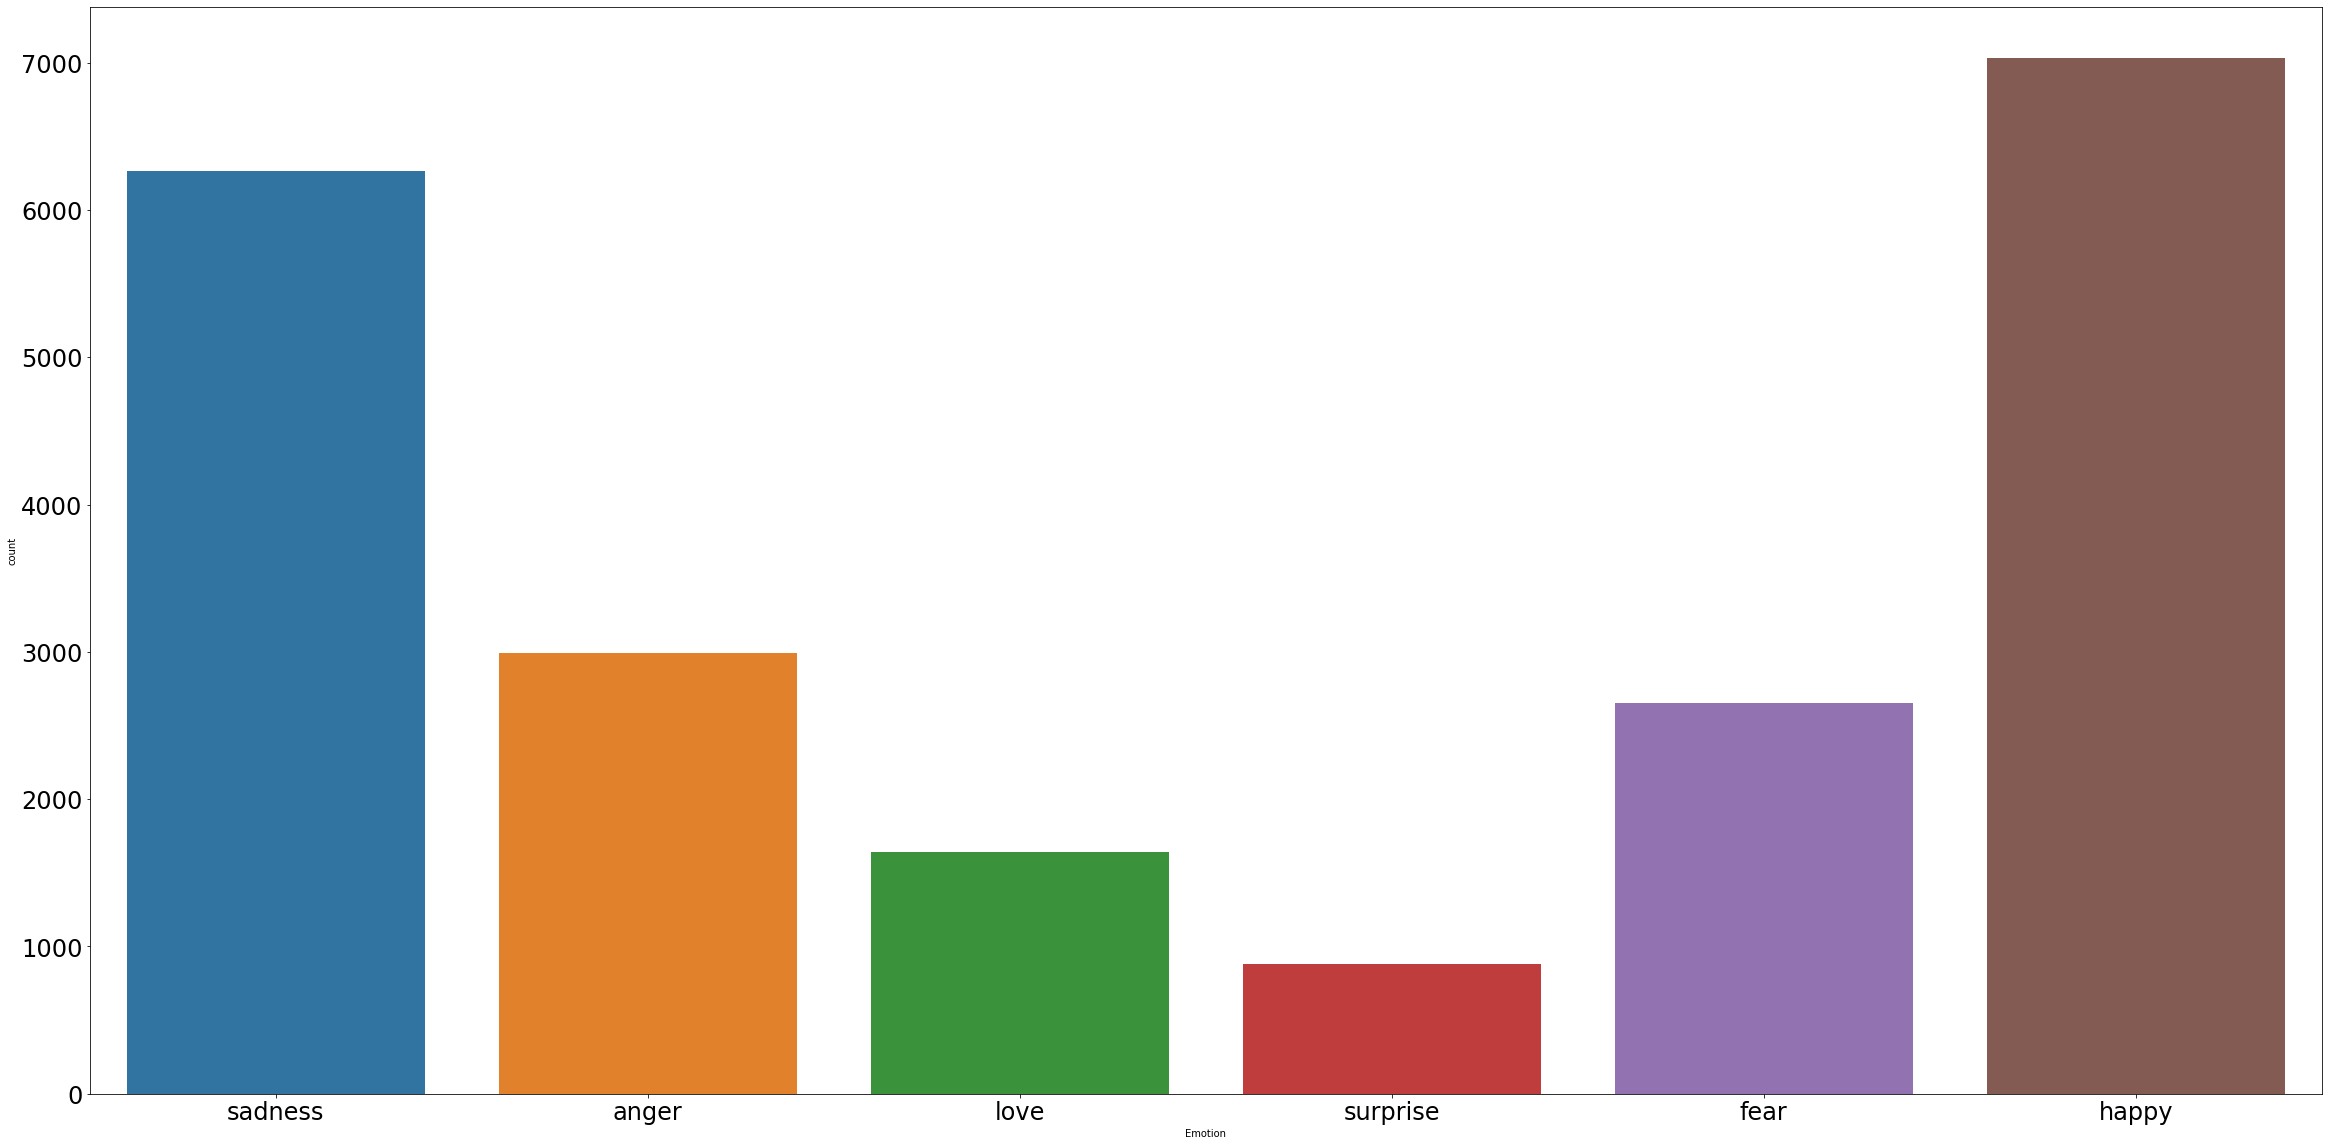

In [ ]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
sns.countplot(data=df, x='Emotion')

<function matplotlib.pyplot.show>

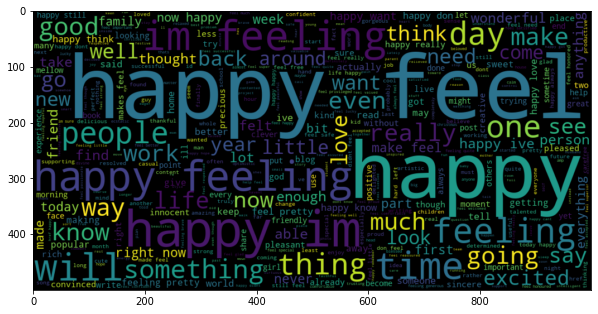

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=df[df. Emotion=='happy' ].to_string()
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

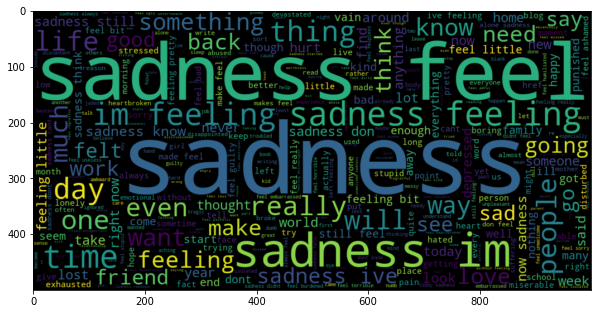

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
negative_text=df[df. Emotion=='sadness' ].to_string()
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

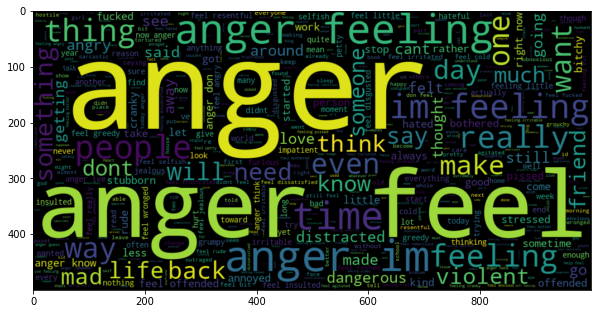

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
anger_text=df[df. Emotion=='anger' ].to_string()
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
anger_words=WC.generate(anger_text)
plt.imshow(anger_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

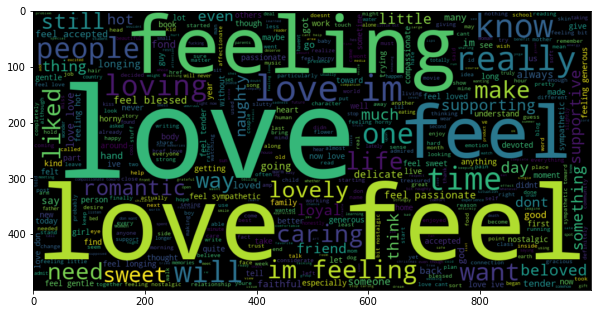

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
love_text=df[df. Emotion=='love' ].to_string()
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
love_words=WC.generate(love_text)
plt.imshow(love_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

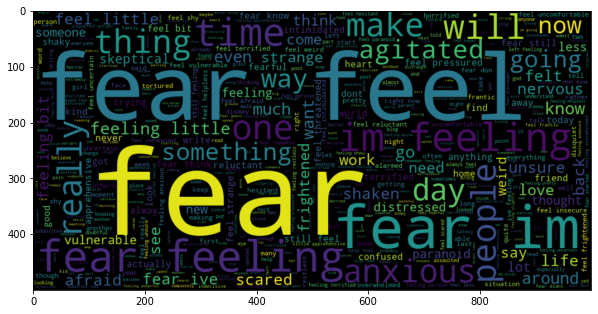

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
fear_text=df[df. Emotion=='fear'].to_string()
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
fear_words=WC.generate(fear_text)
plt.imshow(fear_words,interpolation='bilinear')
plt.show

In [ ]:
X=df[:]['Text']
y=df[:]['Emotion']

In [ ]:
messages=X.reset_index()

### Tokenizing words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
def Stemm(message):
    review = re.sub('[^a-zA-Z]', ' ', message)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [ ]:
from tqdm import tqdm
tqdm.pandas()


In [ ]:
df['Text']=df['Text'].progress_apply(Stemm)
df

100%|██████████| 21459/21459 [01:15<00:00, 282.37it/s]


,Text,Emotion
0,didnt feel humili,sadness
1,go feel hopeless damn hope around someon care ...,sadness
2,im grab minut post feel greedi wrong,anger
3,ever feel nostalg fireplac know still properti,love
4,feel grouchi,anger
...,...,...
21454,melissa stare friend dism,fear
21455,success state elect seen govern parti pummel d...,fear
21456,vincent irrit dismay,fear
21457,kendal hume turn back face dismay coup,fear


kaggle

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[:10]

['didnt feel humili',
 'go feel hopeless damn hope around someon care awak',
 'im grab minut post feel greedi wrong',
 'ever feel nostalg fireplac know still properti',
 'feel grouchi',
 'ive feel littl burden late wasnt sure',
 'ive take milligram time recommend amount ive fallen asleep lot faster also feel like funni',
 'feel confus life teenag jade year old man',
 'petrona year feel petrona perform well made huge profit',
 'feel romant']

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.callbacks import ModelCheckpoint
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [ ]:
#Finding max words
l = 0
for x in corpus:
    l = max(l,len(x.split(' ')))
print(l)

35


In [ ]:
sent_length=35
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3398 3296 8592]
 [   0    0    0 ...  293 7461 9711]
 [   0    0    0 ... 3296 3845 4426]
 ...
 [   0    0    0 ...  975 3611 4094]
 [   0    0    0 ... 1569 4094 5181]
 [   0    0    0 ...    0 4094 2978]]


In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3398,
       3296, 8592], dtype=int32)

In [ ]:
embedded_docs[0].shape

(35,)

In [ ]:
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(6,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 35, 100)           1000000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 35, 100)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               84480     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

In [ ]:
label_encoder = preprocessing.LabelEncoder()

X_final=np.array(embedded_docs)
y = label_encoder.fit_transform(y)
y_final=np.array(y)
print(y_final)

[4 4 0 ... 1 1 1]


In [ ]:
X_final.shape,y_final.shape

((21459, 35), (21459,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=21)

In [ ]:
model_save = ModelCheckpoint('weights.h5', save_best_only = True, save_weights_only = True, monitor = 'val_loss', 
                             mode = 'min', verbose = 1)
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=256,callbacks = [model_save])

Epoch 1/10
61/61 [==============================] - 6s 40ms/step - loss: 2.6238 - accuracy: 0.3959 - val_loss: 1.3306 - val_accuracy: 0.6034

Epoch 00001: val_loss improved from inf to 1.33058, saving model to weights.h5
Epoch 2/10
61/61 [==============================] - 1s 21ms/step - loss: 1.0560 - accuracy: 0.6941 - val_loss: 0.9136 - val_accuracy: 0.7181

Epoch 00002: val_loss improved from 1.33058 to 0.91363, saving model to weights.h5
Epoch 3/10
61/61 [==============================] - 1s 21ms/step - loss: 0.8252 - accuracy: 0.7646 - val_loss: 0.8339 - val_accuracy: 0.7560

Epoch 00003: val_loss improved from 0.91363 to 0.83387, saving model to weights.h5
Epoch 4/10
61/61 [==============================] - 1s 21ms/step - loss: 0.7060 - accuracy: 0.8118 - val_loss: 0.7922 - val_accuracy: 0.8008

Epoch 00004: val_loss improved from 0.83387 to 0.79223, saving model to weights.h5
Epoch 5/10
61/61 [==============================] - 1s 21ms/step - loss: 0.6412 - accuracy: 0.8790 - val

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('weights.h5')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
print(y_pred)

In [ ]:
y_pred[0]

In [ ]:
y_test.shape

In [ ]:
y_pred[0]

In [ ]:
np.where(y_pred[0]==np.amax(y_pred[0]))[0][0]

In [ ]:
for item in y_pred:
  print(type(item))
  break

In [ ]:
from tqdm import tqdm

In [ ]:
dicto={
    0:'sadness',
    1:'anger',
    2:'love',
    3:'surprise',
    4:'fear',
    5:'happy'
}
def list_to_emotion(list_):
  listo=[]
  for item in tqdm(list_):
    listo.append(np.where(item==np.amax(item))[0][0])
  return listo

In [ ]:
test_fn_y=list_to_emotion(y_pred)

In [ ]:
test_fn_y=np.array(test_fn_y)

In [ ]:
test_fn_y[:5]

array([2, 0, 4, 4, 3])

In [ ]:
y_test[:6]

array([2, 0, 4, 4, 3, 0])

In [ ]:
print(accuracy_score(y_test,test_fn_y))

0.8515843429636533


In [ ]:
y_pred=test_fn_y

In [ ]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.70791   0.89951   0.79229       617
           1    0.88993   0.71563   0.79332       531
           2    0.91154   0.88052   0.89576      1381
           3    0.70640   0.76415   0.73414       318
           4    0.92713   0.89663   0.91162      1277
           5    0.69048   0.69048   0.69048       168

    accuracy                        0.85158      4292
   macro avg    0.80556   0.80782   0.80294      4292
weighted avg    0.86038   0.85158   0.85292      4292



Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


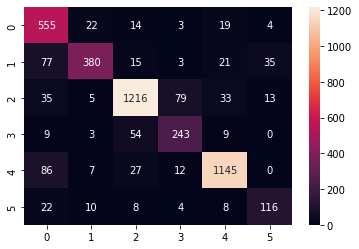

In [ ]:
print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt="d"))

In [ ]:
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

{'anger': 0, 'fear': 1, 'happy': 2, 'love': 3, 'sadness': 4, 'surprise': 5}


In [ ]:
def predict_emotion(stri):
    review = re.sub('[^a-zA-Z]', ' ', stri)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    onehot_repr = [one_hot(review,voc_size)] 
    embed = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
    predicti = model.predict(embed)
    return label_encoder.classes_[np.argmax(predicti)]

In [ ]:
import pickle
pickle.dump(label_encoder, open('/content/drive/MyDrive/text_analysis_label_encoder.pkl', 'wb'))

In [ ]:
#predict_emotion('He is an arrogant and rude person')

In [ ]:
#predict_emotion('bisht why you are like this')

logistic_regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
history_lr = lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
def predict_emotion_lr(stri):
    review = re.sub('[^a-zA-Z]', ' ', stri)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    onehot_repr = [one_hot(review,voc_size)] 
    embed = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
    predicti = lr.predict(embed)
    return label_encoder.classes_[np.argmax(predicti)]

In [ ]:
predict_emotion_lr('He is an arrogant and rude person. The teacher is intimidating and scary')

'anger'

In [ ]:
y_lr_pred = lr.predict(X_test)

In [ ]:
y_lr_pred

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
print(accuracy_score(y_test,y_lr_pred))

0.3294501397949674


In [ ]:
import pickle 

In [ ]:
#pickle.dump(keras,open('kesar_pickle_file.pkl', 'wb'))